## Import Libraries

In [106]:
%matplotlib notebook
import pandas as pd
import numpy as np
import pyexcel_xlsx
%pylab inline
#%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import seaborn as sns
import math

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_scor11e


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['indices', 'f', 'std']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


ImportError: cannot import name 'roc_auc_scor11e'

## Load and clean data

In [107]:
data = pd.read_excel(r"/Users/lszczyrba/Documents/Research/Projects/PR_Housing/Data/master_df_20191021.xlsx")
df = pd.DataFrame(data)
df.set_index('FIPS', inplace=True)

In [108]:
df = df.round(2)

In [109]:
df.columns

Index(['Prop_SFHA_', 'Prop_DG_Ar', 'Ave_LS_cod', 'DG_MaxDe_1', 'HurTrack_D',
       'PeakGust_1', 'MaxSusta_1', 'Count_', 'StrVI', 'SeVI', 'Str+SeVI',
       'SoVI', 'DG_mean_m', 'O_Ind', 'R_Ind', 'R_I_No0', 'R_I_NoO',
       'R_I_No0_NoO', 'cat_3q', 'cat_4q'],
      dtype='object')

In [184]:
df_x = df.drop(['O_Ind', 'R_Ind', 'R_I_No0', 'R_I_NoO',
       'R_I_No0_NoO', 'cat_3q', 'cat_4q'], axis=1)
df_y = df.cat_3q

#Instead of dropping columns to form df_x, can just select certain columns using --> new = old[['A', 'C', 'D']].copy()

In [185]:
df_y

FIPS
72001956300    0
72001956400    1
72001956500    0
72001956600    0
72001956700    0
72001956800    1
72003430100    2
72003430200    1
72003430300    1
72003430401    2
72003430402    2
72003430501    1
72003430502    0
72003430601    1
72003430602    1
72005400100    1
72005400300    1
72005400400    1
72005400501    0
72005400502    1
72005400600    1
72005400700    1
72005400800    2
72005400900    2
72005401000    1
72005401100    1
72005401200    1
72005401301    0
72005401302    1
72005401401    1
              ..
72145560801    2
72145560802    2
72145560900    2
72147950500    2
72147950600    2
72149720100    0
72149720300    0
72149720400    0
72149720502    0
72149720503    0
72149720504    0
72151950600    1
72151950700    2
72151950800    2
72151950900    1
72151951000    0
72151951100    0
72151951200    1
72151951300    2
72153750101    2
72153750102    1
72153750201    2
72153750202    0
72153750300    0
72153750400    0
72153750501    0
72153750502    0
721537505

## Split data into training and testing sets 
By setting a random state, we will get the same split each time \
Delete random state to begin testing new splits again

In [111]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

## Select and train model

In [112]:
model = RandomForestClassifier(max_depth=45, n_estimators=1000, random_state=42)

In [113]:
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=45, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

## Evaluation Function for Classifier

Accuracy = Number of correct predictions / Total number of predicitons made

Precision = ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.

Recall = ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples. The best value is 1 and the worst value is 0.

The F1 score = 2 * (precision * recall) / (precision + recall) where weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:


In [114]:
def evaluation(x_train, y_train, x_test, y_test):
    pred = model.predict(x_test)
    accuracy_train = model.score(x_train, y_train)
    print('The mean training accuracy is {}'.format(accuracy_train))
    accuracy_test = model.score(x_test, y_test)
    print('The mean test accuracy is {}'.format(accuracy_test))
    df_confusion = pd.DataFrame(confusion_matrix(y_test, pred))
    print(df_confusion)
    print(classification_report(y_test, pred))


In [115]:
evaluation(x_train, y_train, x_test, y_test)

The mean training accuracy is 1.0
The mean test accuracy is 0.5423728813559322
    0   1   2
0  30  12  12
1  14  20  22
2   7  14  46
             precision    recall  f1-score   support

          0       0.59      0.56      0.57        54
          1       0.43      0.36      0.39        56
          2       0.57      0.69      0.63        67

avg / total       0.53      0.54      0.54       177



In [116]:
pred = model.predict(x_test)
confusion_matrix(y_test, pred)


array([[30, 12, 12],
       [14, 20, 22],
       [ 7, 14, 46]])

In [117]:
df_confusion = pd.DataFrame(confusion_matrix(y_test, pred))
print(df_confusion)

    0   1   2
0  30  12  12
1  14  20  22
2   7  14  46


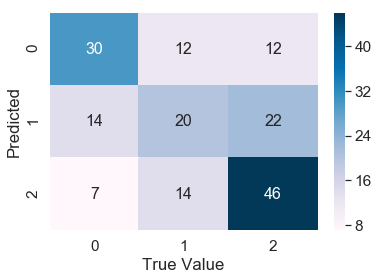

In [118]:
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_confusion, cmap='PuBu', annot=True, annot_kws={"size": 16})# font size
plt.ylabel('Predicted')
plt.xlabel('True Value')

plt.show()

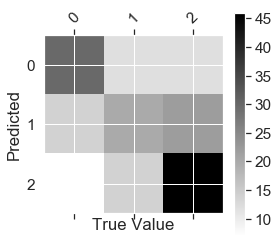

In [119]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel('Predicted')
    plt.xlabel('True Value')

plot_confusion_matrix(df_confusion)

In [127]:
importances = model.feature_importances_
importance_d = pd.DataFrame(importances, index = x_train.columns, columns=['importance']).sort_values('importance', ascending=False)

std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 7 (0.112618)
2. feature 8 (0.107699)
3. feature 11 (0.097507)
4. feature 9 (0.097368)
5. feature 4 (0.092269)
6. feature 10 (0.088571)
7. feature 5 (0.086641)
8. feature 6 (0.086257)
9. feature 0 (0.062709)
10. feature 2 (0.062274)
11. feature 12 (0.040012)
12. feature 3 (0.038238)
13. feature 1 (0.027838)


In [156]:
importances

array([ 0.06270926,  0.02783795,  0.06227442,  0.03823775,  0.09226876,
        0.08664113,  0.08625667,  0.11261774,  0.10769865,  0.09736815,
        0.08857065,  0.09750668,  0.04001219])

In [157]:
importances_df = pd.DataFrame(importances)

In [159]:
data = [x_train.columns, importances_df]

In [165]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Prop_SFHA_,Prop_DG_Ar,Ave_LS_cod,DG_MaxDe_1,HurTrack_D,PeakGust_1,MaxSusta_1,Count_,StrVI,SeVI,Str+SeVI,SoVI,DG_mean_m
1,0,None,None,None,None,None,None,None,None,None,None,None,None


In [153]:
importances= model.feature_importances_
importance_d = pd.DataFrame(index = x_train.columns, columns=['importance']).sort_values('importance', ascending=False)


In [182]:
importance_d.reset_index(inplace=True)

In [183]:
importance_d

,index,importance
0,Count_,0.112618
1,StrVI,0.107699
2,SoVI,0.097507
3,SeVI,0.097368
4,HurTrack_D,0.092269
5,Str+SeVI,0.088571
6,PeakGust_1,0.086641
7,MaxSusta_1,0.086257
8,Prop_SFHA_,0.062709
9,Ave_LS_cod,0.062274


In [178]:
importa = model.feature_importances_
dddddd = [importa, x_train.columns]
import_d = pd.DataFrame(importances, columns=['importance']).sort_values('importance', ascending=False)


,importance,test
7,0.112618,Prop_SFHA_
8,0.107699,Prop_DG_Ar
11,0.097507,Ave_LS_cod
9,0.097368,DG_MaxDe_1
4,0.092269,HurTrack_D
10,0.088571,PeakGust_1
5,0.086641,MaxSusta_1
6,0.086257,Count_
0,0.062709,StrVI
2,0.062274,SeVI


## ROC Score

In [85]:
def multiclass_roc_auc_score(y_test, pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    pred = lb.transform(pred)
    return roc_auc_score(y_test, pred, average=average)

In [86]:
multiclass_roc_auc_score(y_test, pred)

0.65076115456861394

In [87]:
# generate a no skill prediction (majority class)
no_skill = [0 for _ in range(len(y_test))]

# calculate scores
no_skill_auc = roc_auc_score(y_test, no_skill)
#model_auc = roc_auc_score(y_test, pred)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (no_skill_au))
#print('Logistic: ROC AUC=%.3f' % (model_auc))

# # calculate roc curves
# ns_fpr, ns_tpr, _ = roc_curve(y_test, no_skill)
# model_fpr, model_tpr, _ = roc_curve(testy, pred)

ValueError: Expected 2D array, got 1D array instead:
array=[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## This might be a good evalutaiton function for a Regression

In [1]:
def evaluation(x_train, y_train, x_test, y_test):
    pred = model.predict(x_test)    
    mse = mean_squared_error(y_test, pred)
    print('The mean square error is {}'.format(mse))
    rmse = math.sqrt(mean_squared_error(y_test, pred))
    print('The root mean square error is {}'.format(rmse))
    errors = pred - y_test
    meanerror = np.mean(errors)
    print('The mean  error is {}'.format(meanerror))
    meanabserrors = np.mean(abs(pred - y_test))
    print('The mean absolute error is {}'.format(meanabserrors))